<a href="https://colab.research.google.com/github/59822/ml_models/blob/main/modelos_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
# EDA

file_path = "loan_data_set.csv"  # Ruta del archivo
df = pd.read_csv(file_path)

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

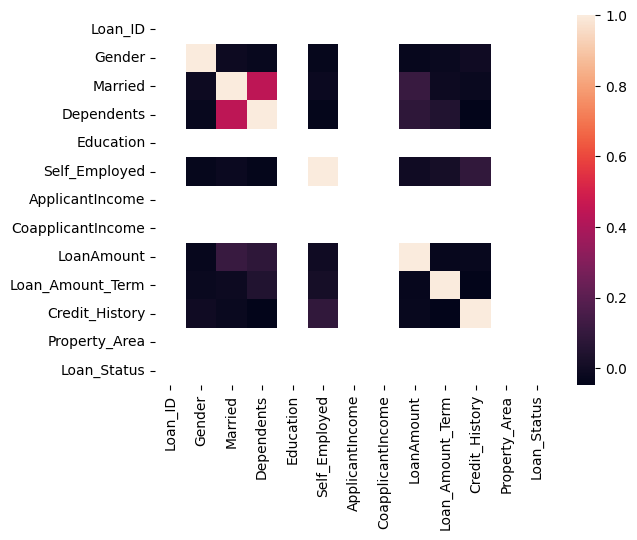

In [51]:
#mask = np.triu((np.ones_like(df.isnull().corr())))
sns.heatmap(df.isnull().corr())

In [52]:
df.isnull().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [53]:
df.shape

(614, 13)

In [54]:
df.dropna(inplace = True)
df.shape

(480, 13)

In [55]:
# Regression Logistic

categorical = df.select_dtypes(exclude = [np.number]).columns.tolist()
print(categorical)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [60]:
#df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education',
#                                             'Self_Employed', 'Property_Area'],  drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  480 non-null    object 
 1   Dependents               480 non-null    object 
 2   ApplicantIncome          480 non-null    int64  
 3   CoapplicantIncome        480 non-null    float64
 4   LoanAmount               480 non-null    float64
 5   Loan_Amount_Term         480 non-null    float64
 6   Credit_History           480 non-null    float64
 7   Loan_Status              480 non-null    object 
 8   Gender_Male              480 non-null    bool   
 9   Married_Yes              480 non-null    bool   
 10  Education_Not Graduate   480 non-null    bool   
 11  Self_Employed_Yes        480 non-null    bool   
 12  Property_Area_Semiurban  480 non-null    bool   
 13  Property_Area_Urban      480 non-null    bool   
dtypes: bool(6), float64(4), int64(1

In [118]:
data = df.copy()

# Convertir a binario
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

y = df['Loan_Status']
y_encoded = LabelEncoder.fit_transform(y)


data.drop(columns = ['Loan_ID', 'Dependents'], axis = 1, inplace= True)
X = data.drop(columns= ['Loan_Status'])

y = pd.DataFrame(y_encoded, columns = ['Loan Status'])

In [133]:
object_X = X.select_dtypes(exclude = [np.number]).columns.tolist()
print(object_X)


['Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']


In [137]:
for col in object_X:
  X[col] = LabelEncoder.fit_transform(X[col])

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          480 non-null    int64  
 1   CoapplicantIncome        480 non-null    float64
 2   LoanAmount               480 non-null    float64
 3   Loan_Amount_Term         480 non-null    float64
 4   Credit_History           480 non-null    float64
 5   Gender_Male              480 non-null    int64  
 6   Married_Yes              480 non-null    int64  
 7   Education_Not Graduate   480 non-null    int64  
 8   Self_Employed_Yes        480 non-null    int64  
 9   Property_Area_Semiurban  480 non-null    int64  
 10  Property_Area_Urban      480 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 61.2 KB


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

## Mejorar la accuracy

##### 1. Vamos a escalar los datos con preprocessing la cual puede desarrollarse con
1. StandardScales (Modelos regresion logistica, lineales o normalmente distribuido)
2. MinMax (Redes neuronales)
3. RobustScaler (Outliers)
4. MaxAbs (Con negativos)


In [140]:
from sklearn.preprocessing import StandardScaler

Standar = StandardScaler()
X_train = Standar.fit_transform(X_train)
X_test = Standar.fit_transform(X_test)

In [144]:
model = LogisticRegression(max_iter = 500 )
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=500)

In [145]:
y_pred = model.predict(X_test)

In [146]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8125


# Cambiar el escalador y hacer boxplot  